In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "C:\\Users\\91897\\Downloads\\cell_samples.csv"
df = pd.read_csv(path)
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.Class.value_counts()

Class
2    458
4    241
Name: count, dtype: int64

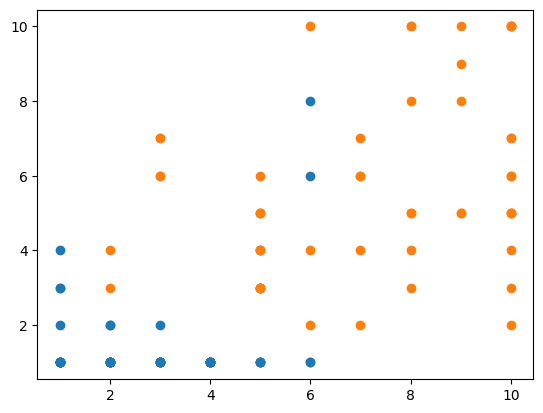

In [20]:
plt.scatter(df[df['Class']==2][0:50]['Clump'],df[df['Class']==2][0:50]['UnifShape'])
plt.scatter(df[df['Class']==4][0:50]['Clump'],df[df['Class']==4][0:50]['UnifShape'])

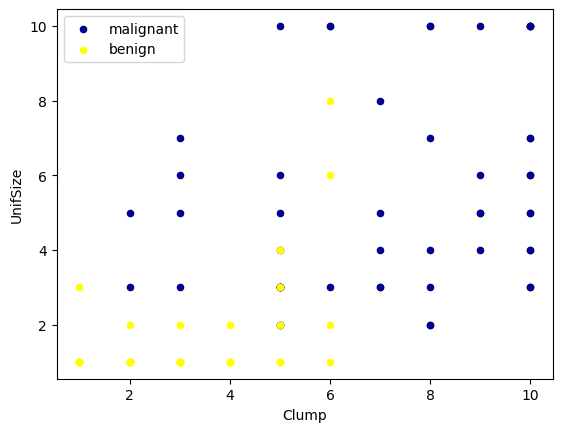

In [25]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [22]:
cell_df = df

In [26]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [30]:
df['BareNuc'] = pd.to_numeric(df['BareNuc'],errors='coerce').notnull().astype('int')

In [31]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [32]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asanyarray(feature_df)
X[0:5]

array([[5, 1, 1, 1, 2, 1, 3, 1, 1],
       [5, 4, 4, 5, 7, 1, 3, 2, 1],
       [3, 1, 1, 1, 2, 1, 3, 1, 1],
       [6, 8, 8, 1, 3, 1, 3, 7, 1],
       [4, 1, 1, 3, 2, 1, 3, 1, 1]], dtype=int64)

In [34]:
y = np.asanyarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [36]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [39]:
yhat = clf.predict(X_test)
yhat[0:5]

array([4, 2, 4, 4, 2], dtype=int64)

In [41]:
y_test[0:5]

array([4, 2, 2, 4, 2], dtype=int64)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.96      0.98      0.97        88
           4       0.96      0.92      0.94        52

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

Confusion matrix, without normalization
[[86  2]
 [ 4 48]]


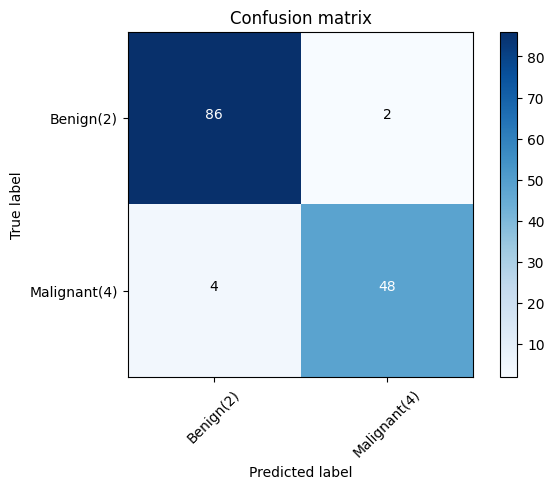

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [45]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9569634595411198

In [46]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)

0.9347826086956522

In [47]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=2))

Avg F1-score: 0.9568
Jaccard score: 0.9355
